In [131]:
import sys
sys.path.append('../scripts')
from data_preparation import load_data
from eda import load_data

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
plt.style.use('ggplot')

Load the cleaned dataset.

In [133]:
df_benin = load_data('../../data/cleaned/benin_cleaned.csv')
df_togo = load_data('../../data/cleaned/togo_cleaned.csv')
df_sierraleone = load_data('../../data/cleaned/sierraleone_cleaned.csv')

Add country column to each dataset and join the datasets in to one datafram. 

In [134]:
df_benin["Country"] = "Benin"
df_togo["Country"] = "Togo"
df_sierraleone["Country"] = "Sierra Leone"

In [135]:
df_all = pd.concat([df_benin, df_sierraleone, df_togo], ignore_index=True)
df_all.to_csv("../../data/cleaned/all_cleaned.csv", index=False)
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country,Unnamed: 0
0,2021-08-09 06:54:00,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7,Benin,NaN
1,2021-08-09 06:55:00,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8,Benin,NaN
2,2021-08-09 06:56:00,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9,Benin,NaN
3,2021-08-09 06:57:00,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9,Benin,NaN
4,2021-08-09 06:58:00,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0,Benin,NaN


### Metric Comparison

In [136]:
df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)



GHI                    DNI                     DHI         \
                mean median     std    mean  median     std    mean median   
Country                                                                      
Benin         513.41  520.3  304.77  356.48  352.25  279.73  247.40  227.8   
Sierra Leone  445.47  406.1  294.38  256.39  166.30  263.17  251.60  242.4   
Togo          454.08  430.3  319.10  296.41  233.80  283.53  228.17  211.4   

                      
                 std  
Country               
Benin         143.42  
Sierra Leone  141.63  
Togo          150.06

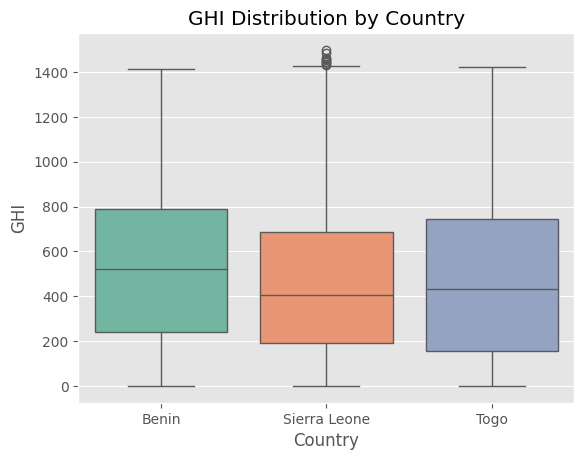

In [137]:
sns.boxplot(data=df_all, x="Country", y="GHI", hue="Country", legend=False, palette="Set2")
plt.title("GHI Distribution by Country")
plt.show()

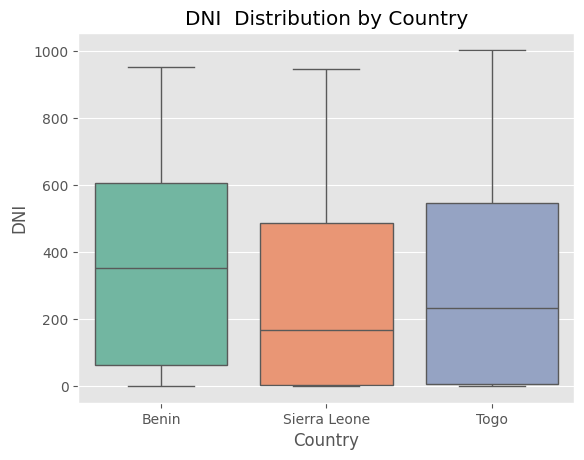

In [138]:
sns.boxplot(data=df_all, x="Country", y="DNI", hue="Country", legend=False, palette="Set2")
plt.title("DNI  Distribution by Country")
plt.show()

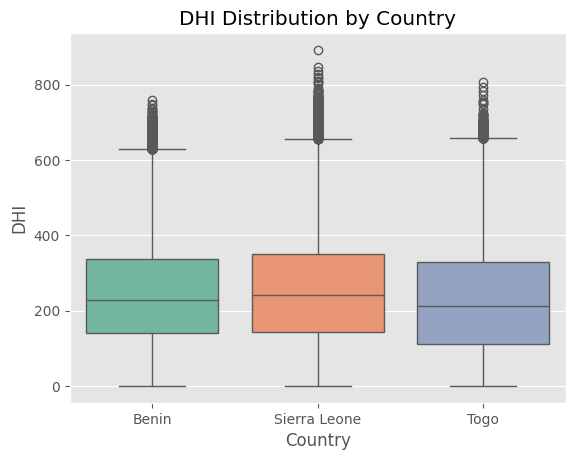

In [139]:
sns.boxplot(data=df_all, x="Country", y="DHI", hue="Country", legend=False, palette="Set2")
plt.title("DHI Distribution by Country")
plt.show()

### Statistical Testing for GHI Differences Across Countries

In [140]:
ghi_benin = df_benin['GHI']
ghi_sierraleone = df_sierraleone['GHI']
ghi_togo = df_togo['GHI']

In [141]:
anova_res = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)

print(f"ANOVA F-statistic: {anova_res.statistic:.2f}")
print(f"ANOVA p-value: {anova_res.pvalue:.3e}")

ANOVA F-statistic: 3594.79
ANOVA p-value: 0.000e+00


**Interpretation:** The mean GHI differs across countries. However, because ANOVA assumptions may not be fully met, results should be interpreted with caution.

In [142]:
kruskal_res = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"Kruskal–Wallis H-statistic: {kruskal_res.statistic:.2f}, p-value: {kruskal_res.pvalue:.3e}")

Kruskal–Wallis H-statistic: 7607.27, p-value: 0.000e+00


**Interpretation:** Since p < 0.05, the **distributions of GHI differ significantly** across Benin, Sierra Leone, and Togo.

Both tests indicate that solar irradiance (GHI) varies significantly between the three countries, reflecting distinct solar energy potentials.

### Key Observations Across the Regions

- **Benin** has the highest median GHI (520.3 W/m²) and also shows the greatest variability (std ≈ 305 W/m²), suggesting strong but fluctuating solar potential.  
- **Togo** has a slightly lower median GHI (430.3 W/m²) than Benin but a similar range of variability, indicating moderately high solar potential.  
- **Sierra Leone** has the lowest median GHI (406.1 W/m²) but the highest maximum observed value (1499 W/m²), implying occasional very strong irradiance but generally lower average solar availability.  


### Visual Summary

This visual summary is added for all three solar radiation measures.

In [143]:
df_summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].mean().T.round(6)
df_summary

Country,Benin,Sierra Leone,Togo
GHI,513.411100,445.471047,454.081218
DNI,356.480524,256.390219,296.409415
DHI,247.397346,251.600694,228.166180


<Figure size 1200x600 with 0 Axes>

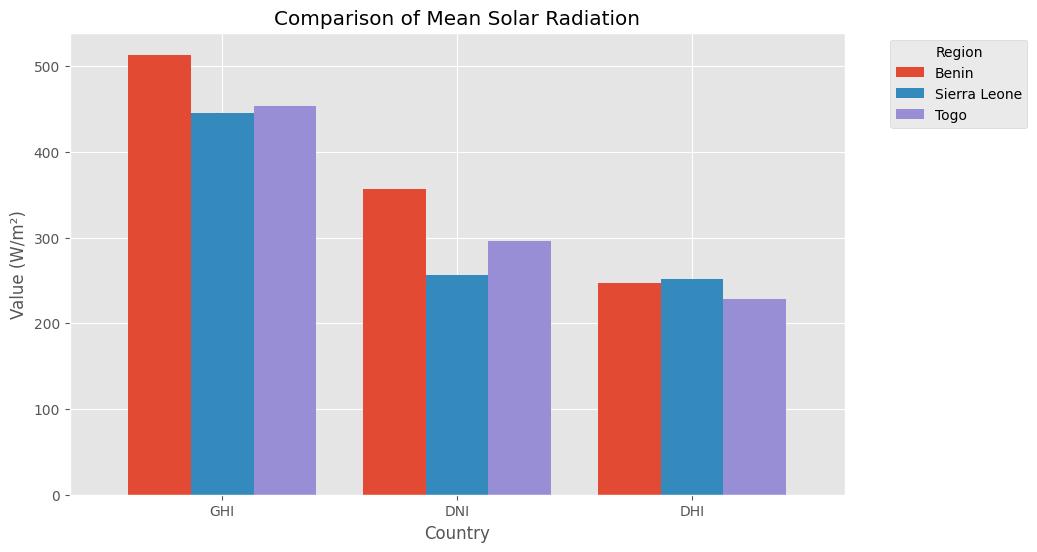

In [144]:
plt.figure(figsize=(12, 6))

df_summary.plot(kind='bar', width=0.8, figsize=(10,6))
        
plt.title('Comparison of Mean Solar Radiation')
plt.xlabel('Country')
plt.ylabel('Value (W/m²)')
plt.xticks(rotation=0)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()